In [4]:
#libs de dados
import pandas as pd
import numpy as np

#libs graficas
import matplotlib.pyplot as plt #sns no video
import seaborn as sn #sns no video

#avisos
import warnings
warnings.filterwarnings('ignore')

#config Pandas
pd.set_option('display.max_rows',200)
pd.set_option('display.max_columns',100)

#config Matplot
plt.rcParams['figure.figsize'] = (15,6)
plt.style.use('seaborn-darkgrid')


baseData= pd.read_csv('./house_data.csv')

print('dimensão da base= '+ str(baseData.shape))

dimensão da base= (10692, 13)


In [5]:
#vendo dados
baseData.head()


,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [6]:
baseData.drop(columns=['fire insurance (R$)','total (R$)'],inplace=True)
baseData.isnull().sum().sort_values(ascending=False)


city                 0
area                 0
rooms                0
bathroom             0
parking spaces       0
floor                0
animal               0
furniture            0
hoa (R$)             0
rent amount (R$)     0
property tax (R$)    0
dtype: int64

In [7]:
#campos Unicos
baseData.nunique()


city                    5
area                  517
rooms                  11
bathroom               10
parking spaces         11
floor                  35
animal                  2
furniture               2
hoa (R$)             1679
rent amount (R$)     1195
property tax (R$)    1243
dtype: int64


EDA

In [8]:
categoryColumns= baseData.columns[baseData.dtypes == object]  
numbersColumns= baseData.columns[baseData.dtypes != object]  

#analise dos categoricos
print(categoryColumns)

for column in categoryColumns:
    column
    baseData[column].value_counts(normalize=True)*100
    

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')


In [9]:
#consertando dados
baseData.loc[baseData['floor']== '301']
baseData.iloc[2562,5] = 30

In [10]:
#substituindo o - por 0
baseData['floor'] = baseData['floor'].apply(lambda r : 0 if r == '-' else r)

#substituindo tipos de dados
baseData['floor'] = pd.to_numeric(baseData['floor'])


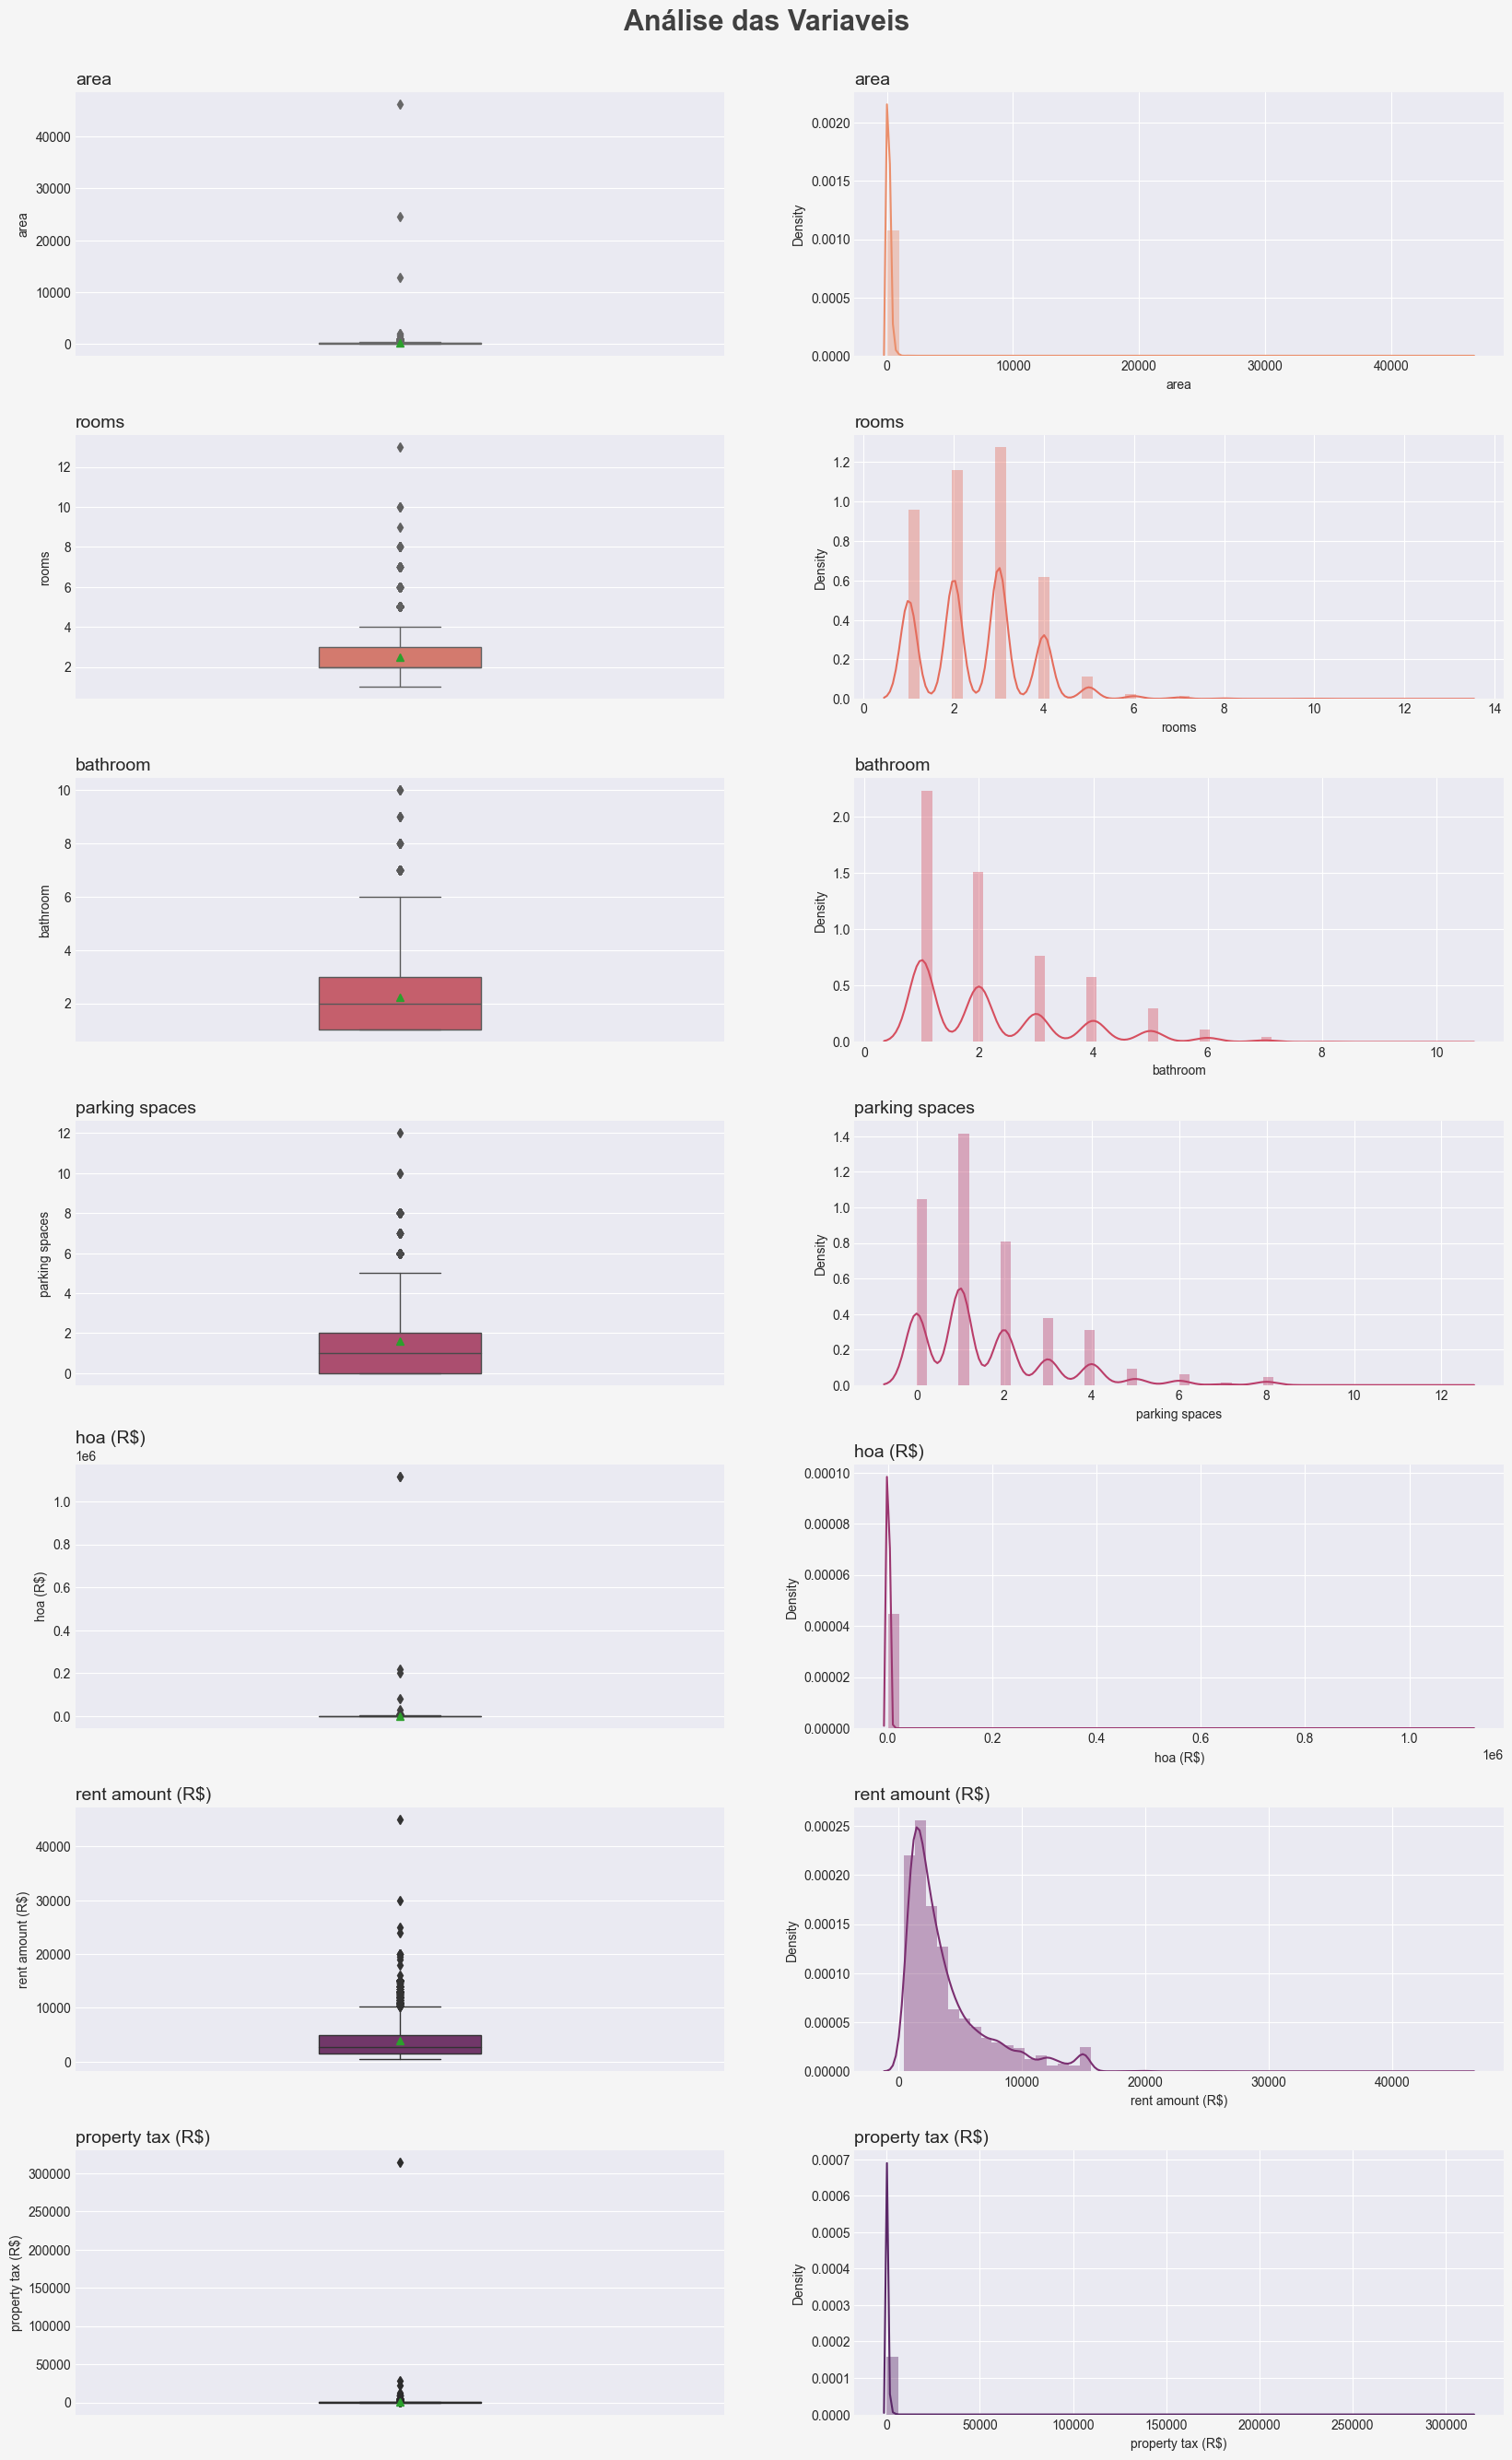

In [11]:

#GRID - GRAFICOS

#tamanho
Figura,eixo = plt.subplots(figsize=(20,30))


#cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de Cores
paletteOfColors=sn.color_palette('flare', len(numbersColumns) * 2)

#Titulo
plt.suptitle('Análise das Variaveis',fontsize=22,color='#404040',fontweight=600)

#Estrutura
rows=7
columns=2 #(boxplot- Distplot)
position=1


for column in numbersColumns:
    #plot no grid -- Boxplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.boxplot(data=baseData,y=column,showmeans=True,saturation=0.75,
               linewidth=1,color=paletteOfColors[position],width=0.25)
    
    position+=1

    #plot no grid -- Distplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.distplot(baseData[column],color=paletteOfColors[position-1])
    position+=1


#ajuste de grid
plt.subplots_adjust(top=0.95, hspace=0.3)



In [12]:
baseData.loc[baseData['area'] >= 10000]['area']


2397    46335
5915    24606
9241    12732
Name: area, dtype: int64

In [13]:
baseData.drop(index=[2397,5915,9241],inplace =True)

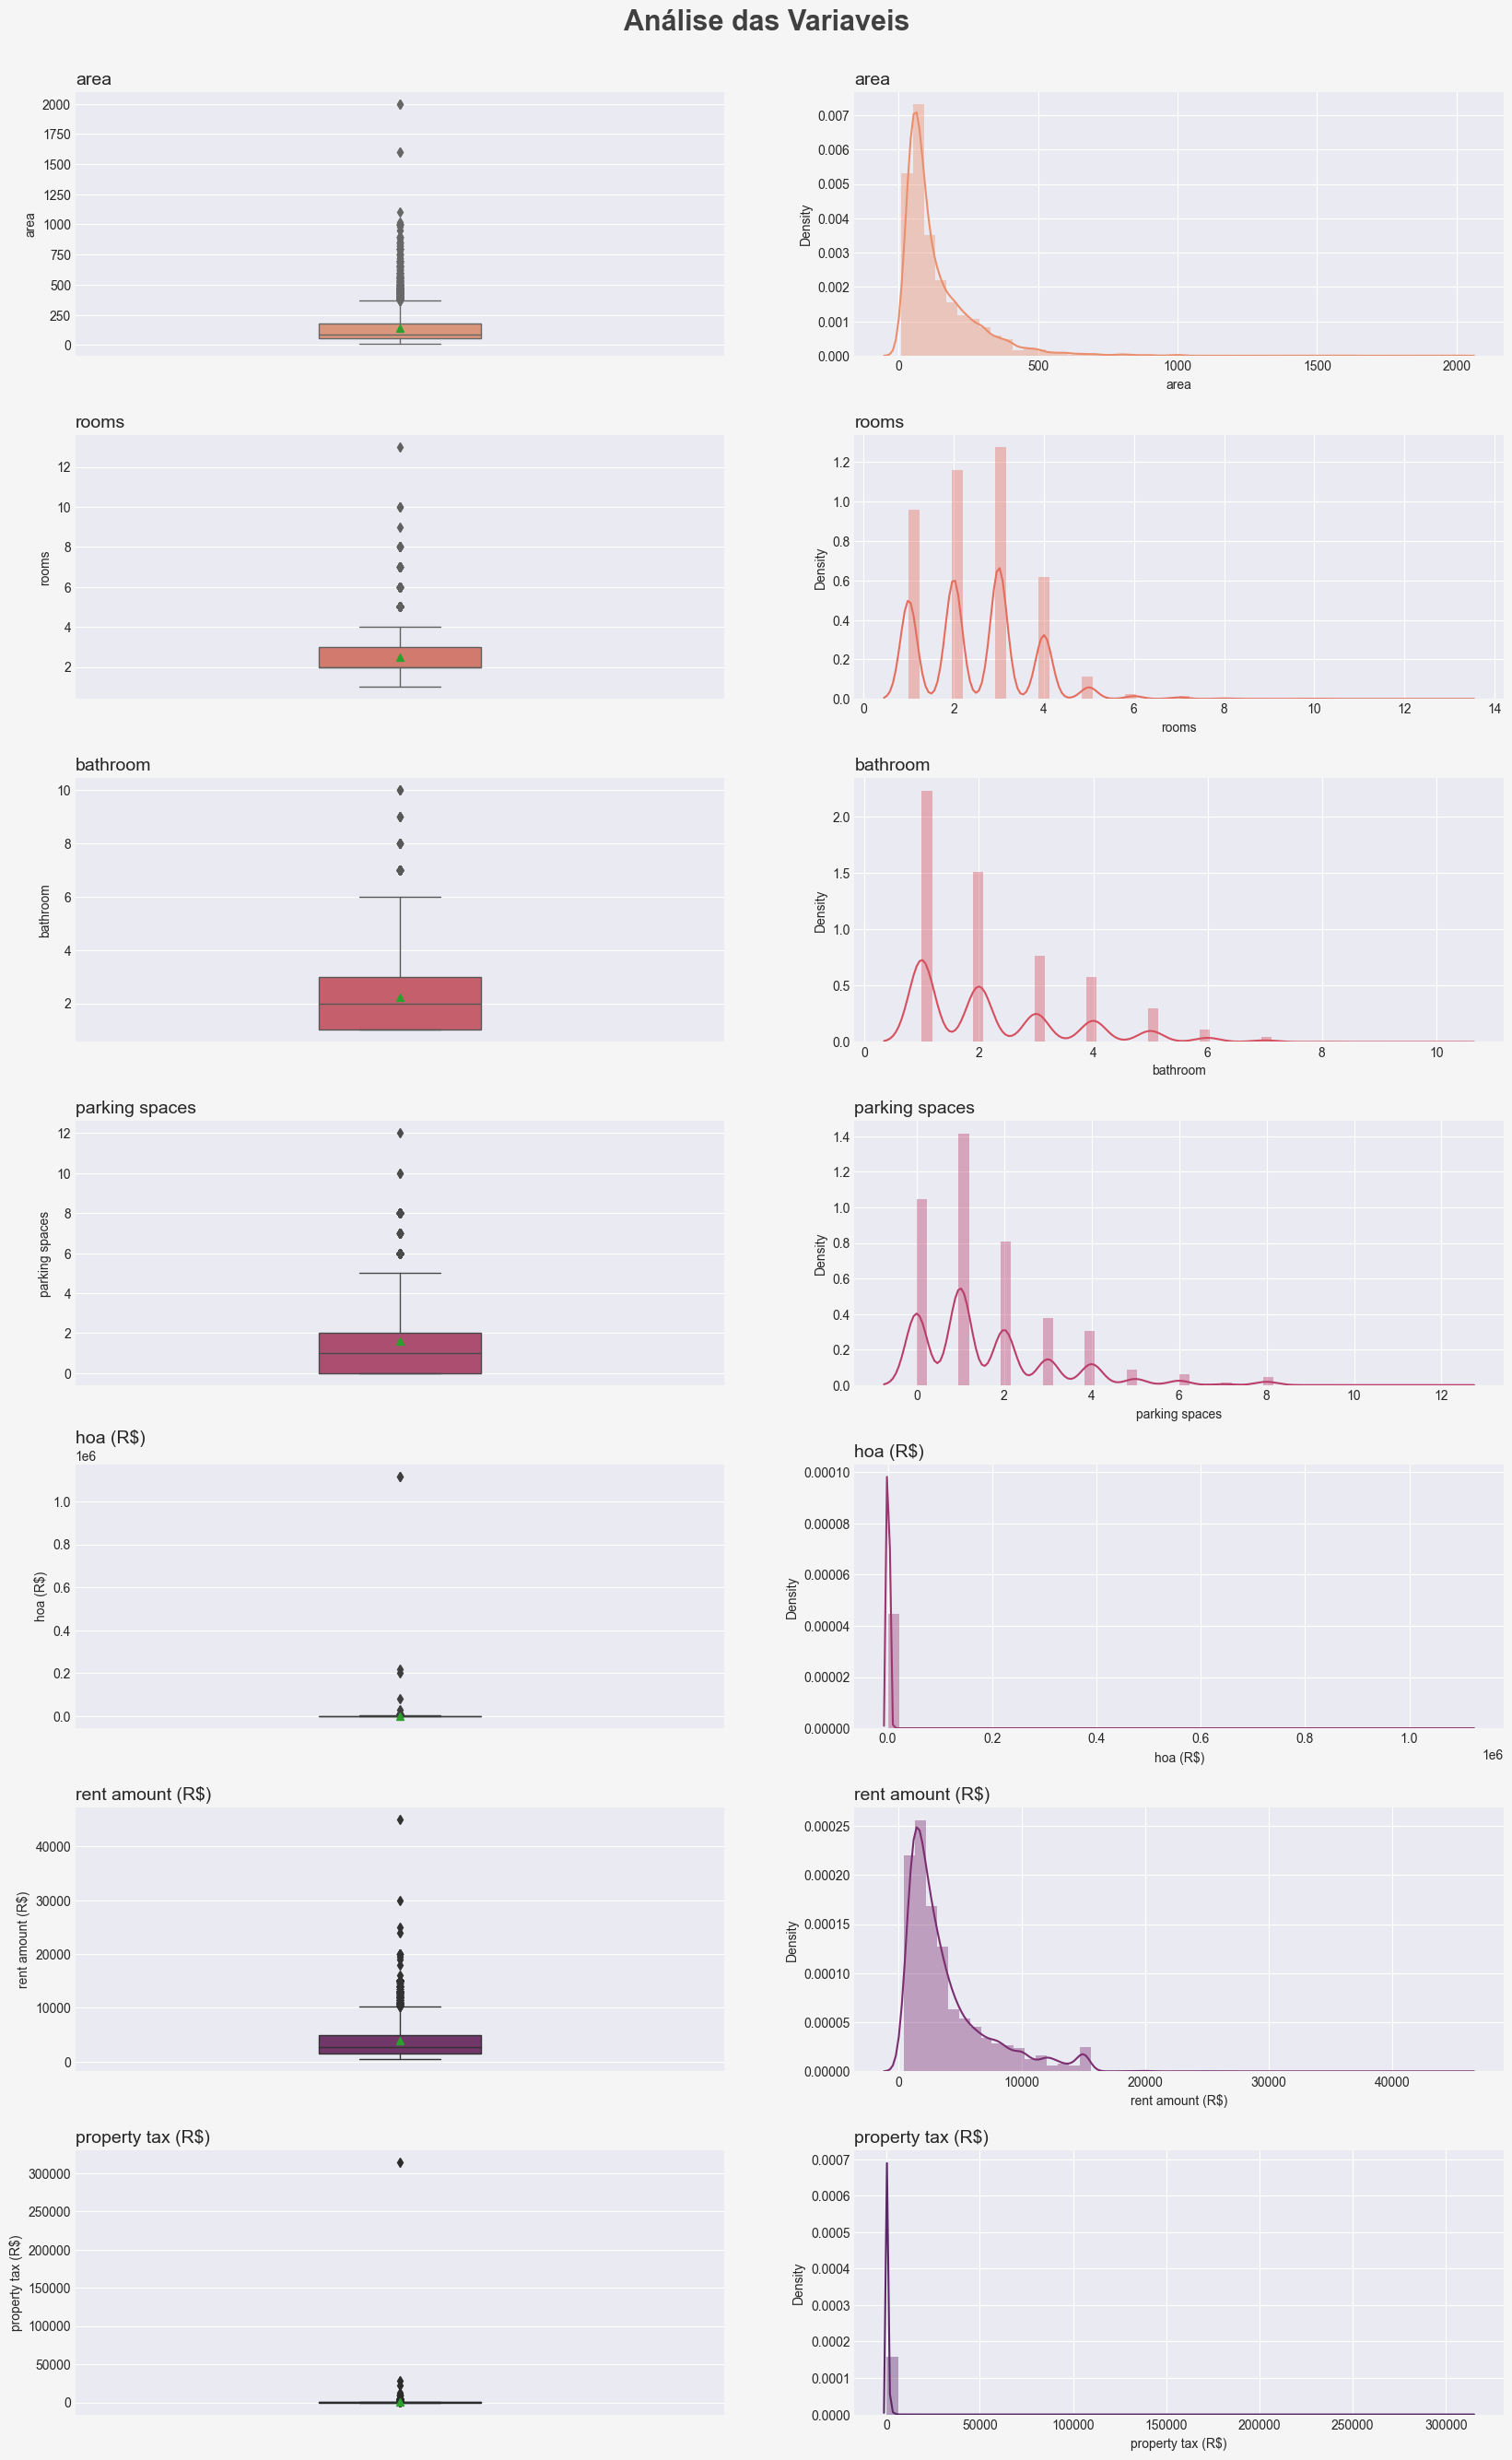

In [14]:
#GRID - GRAFICOS

#tamanho
Figura,eixo = plt.subplots(figsize=(20,30))


#cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de Cores
paletteOfColors=sn.color_palette('flare', len(numbersColumns) * 2)

#Titulo
plt.suptitle('Análise das Variaveis',fontsize=22,color='#404040',fontweight=600)

#Estrutura
rows=7
columns=2 #(boxplot- Distplot)
position=1


for column in numbersColumns:
    #plot no grid -- Boxplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.boxplot(data=baseData,y=column,showmeans=True,saturation=0.75,
               linewidth=1,color=paletteOfColors[position],width=0.25)
    
    position+=1

    #plot no grid -- Distplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.distplot(baseData[column],color=paletteOfColors[position-1])
    position+=1


#ajuste de grid
plt.subplots_adjust(top=0.95, hspace=0.3)

In [15]:
#baseData['hoa (R$)'].max()
baseData.loc[baseData['hoa (R$)'] >= 10000]['hoa (R$)']

255     1117000
415       14130
974       10000
1213      15000
1444      32000
2859     200000
2928      81150
5293      14000
6230     220000
6979    1117000
8858      10000
Name: hoa (R$), dtype: int64

In [16]:
baseData.drop(index=[255,415,974,1213,1444,2859,2928,5293,6230,6979,8858],inplace =True)

In [17]:
baseData.tail()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
10687,Porto Alegre,63,2,1,1,5,not acept,furnished,402,1478,24
10688,São Paulo,285,4,4,4,17,acept,not furnished,3100,15000,973
10689,Rio de Janeiro,70,3,3,0,8,not acept,furnished,980,6000,332
10690,Rio de Janeiro,120,2,2,2,8,acept,furnished,1585,12000,279
10691,São Paulo,80,2,1,0,0,acept,not furnished,0,1400,165


In [18]:
baseData['rent amount (R$)'].describe()
baseData.loc[baseData['rent amount (R$)'] >= 40000]['rent amount (R$)']

2182    45000
Name: rent amount (R$), dtype: int64

In [19]:
baseData.drop(index=[2182],inplace =True)

In [20]:
baseData['property tax (R$)'].describe()

count     10677.000000
mean        364.014049
std        3106.613682
min           0.000000
25%          38.000000
50%         125.000000
75%         375.000000
max      313700.000000
Name: property tax (R$), dtype: float64

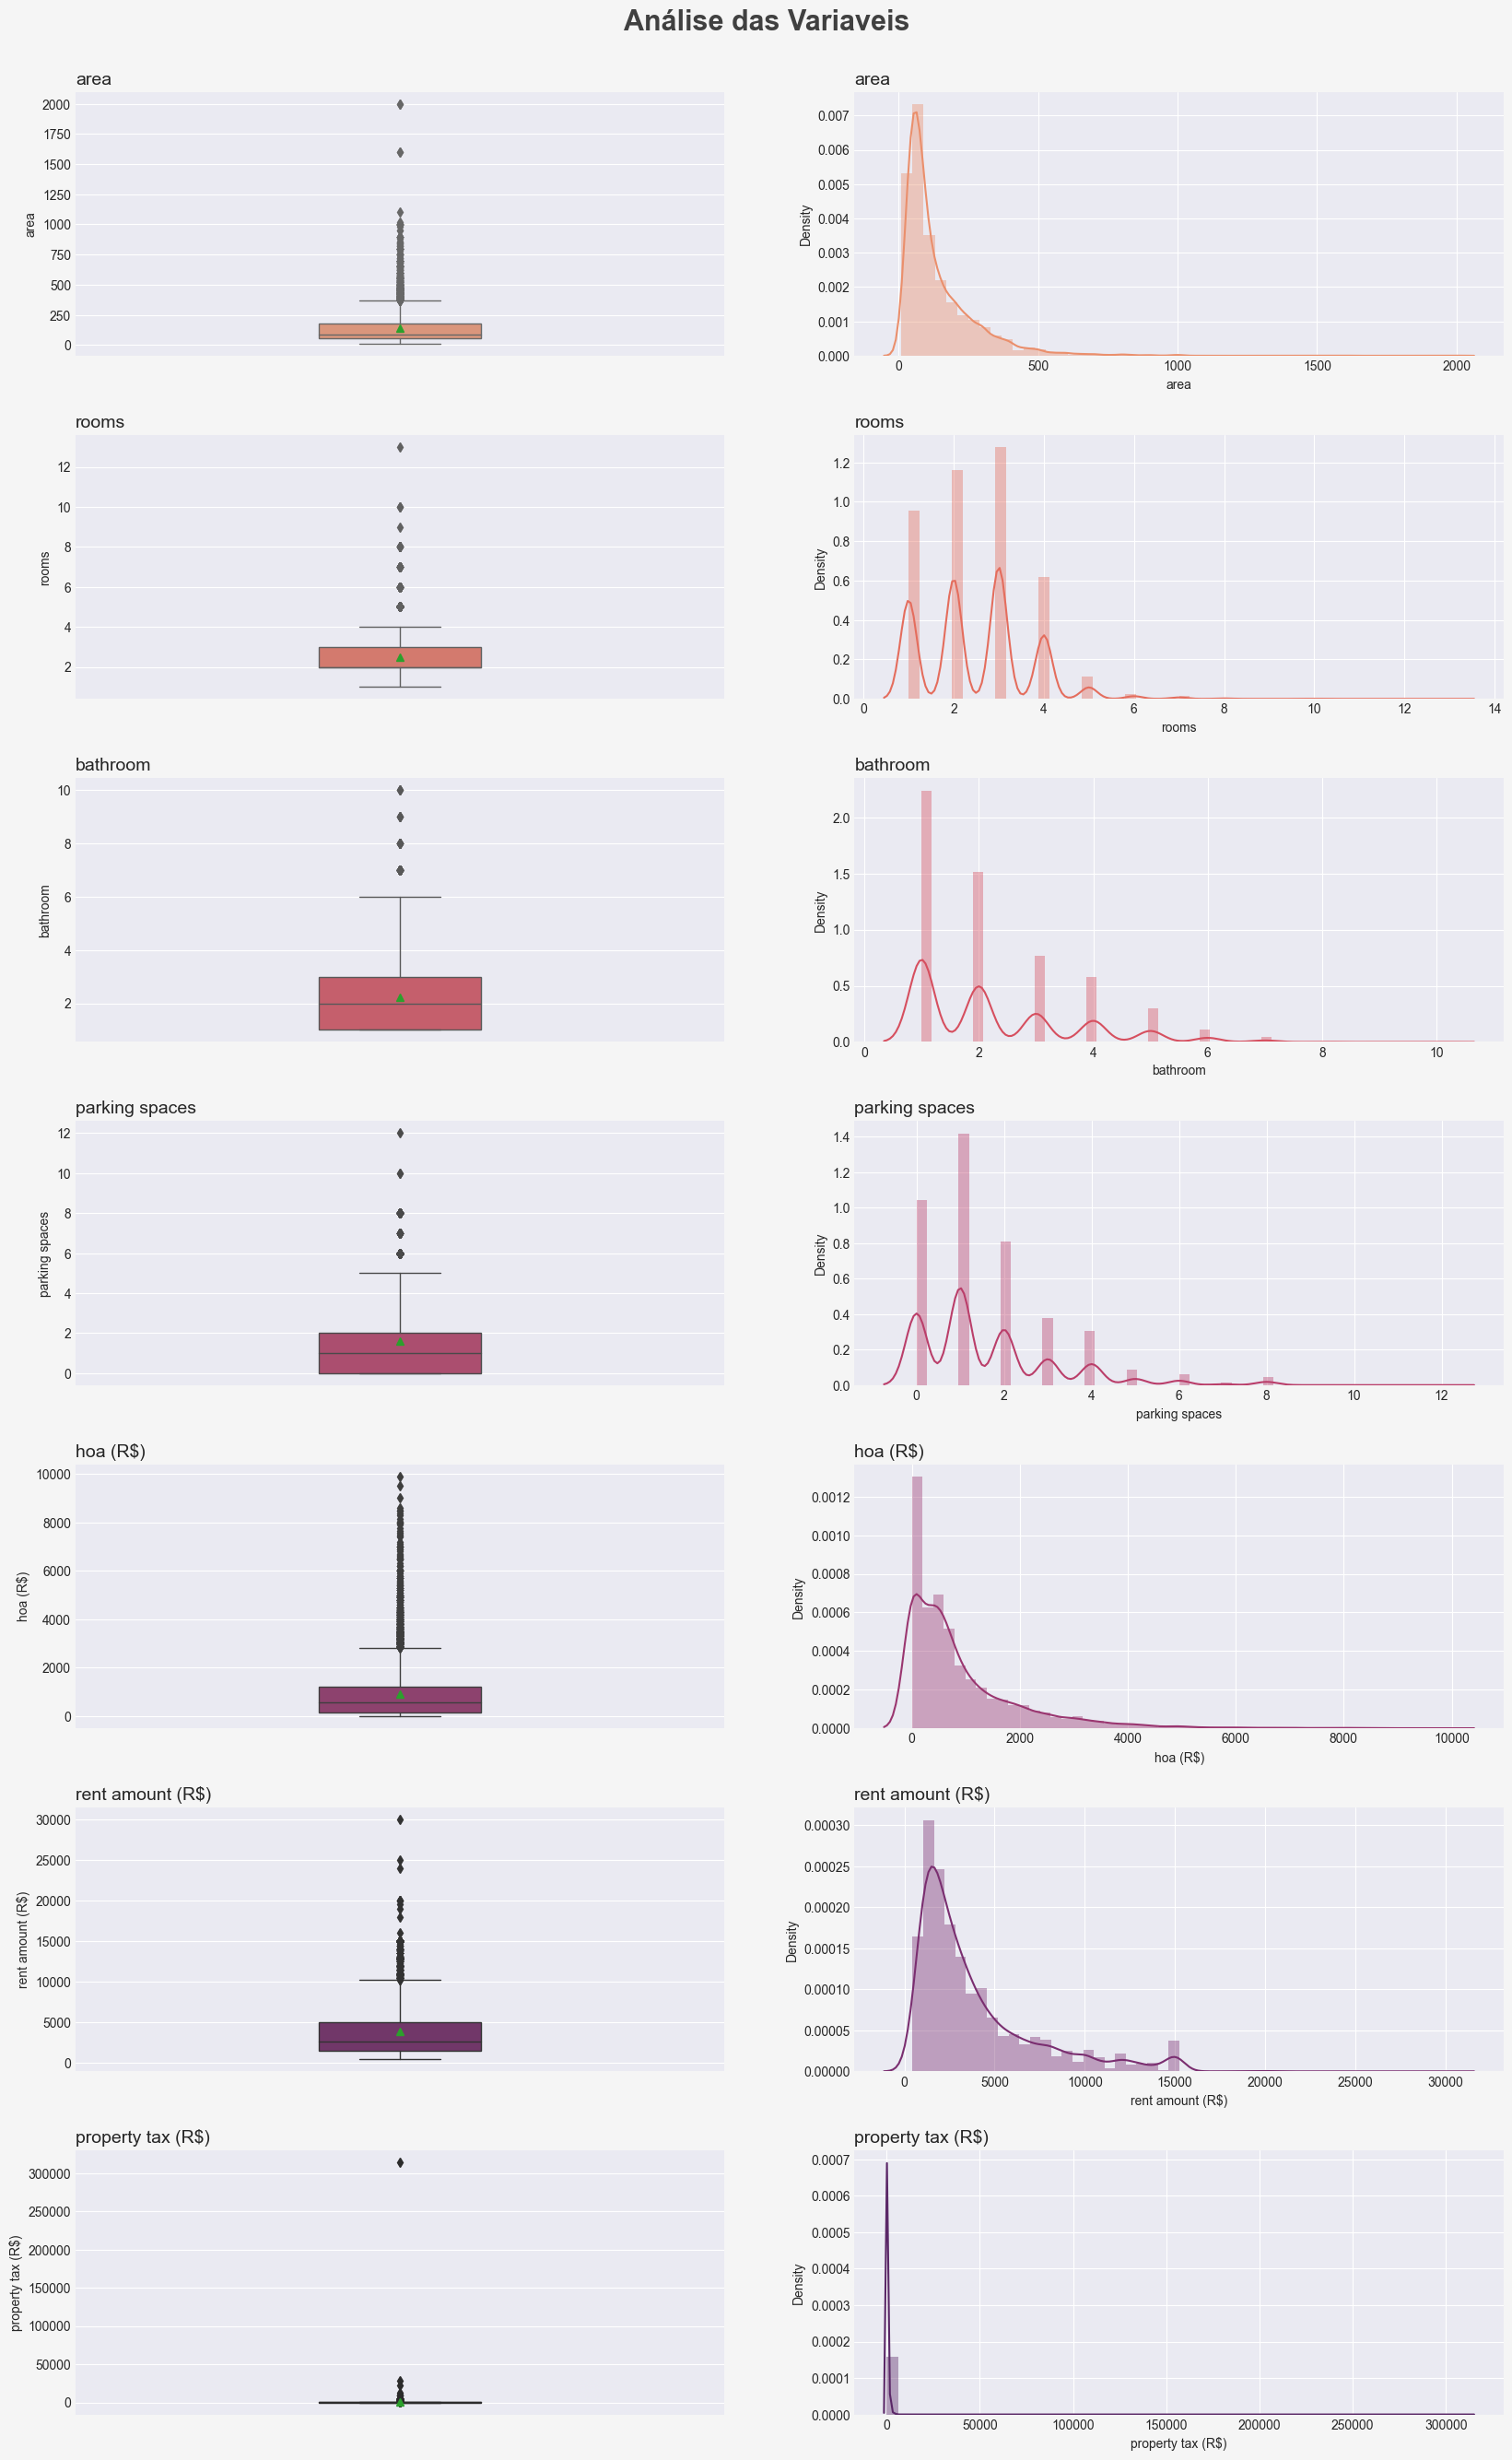

In [21]:
#GRID - GRAFICOS

#tamanho
Figura,eixo = plt.subplots(figsize=(20,30))


#cor de fundo
cor_fundo = '#f5f5f5'
Figura.set_facecolor(cor_fundo)

#Paleta de Cores
paletteOfColors=sn.color_palette('flare', len(numbersColumns) * 2)

#Titulo
plt.suptitle('Análise das Variaveis',fontsize=22,color='#404040',fontweight=600)

#Estrutura
rows=7
columns=2 #(boxplot- Distplot)
position=1


for column in numbersColumns:
    #plot no grid -- Boxplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.boxplot(data=baseData,y=column,showmeans=True,saturation=0.75,
               linewidth=1,color=paletteOfColors[position],width=0.25)
    
    position+=1

    #plot no grid -- Distplot
    plt.subplot(rows,columns,position)
    plt.title(f'{column}',loc='left',fontsize=14,fontweight=200)
    sn.distplot(baseData[column],color=paletteOfColors[position-1])
    position+=1


#ajuste de grid
plt.subplots_adjust(top=0.95, hspace=0.3)

In [22]:
baseData.loc[baseData['property tax (R$)'] >= 250000]

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
6645,São Paulo,42,1,2,1,6,not acept,not furnished,690,2500,313700


In [23]:
baseData.drop(index=[6645],inplace =True)

engenharia de features

In [24]:
categoryColumns

Index(['city', 'floor', 'animal', 'furniture'], dtype='object')

In [25]:
baseData['furniture'].describe()

count             10676
unique                2
top       not furnished
freq               8074
Name: furniture, dtype: object

In [26]:
baseData['city'].unique()

array(['São Paulo', 'Porto Alegre', 'Rio de Janeiro', 'Campinas',
       'Belo Horizonte'], dtype=object)

In [27]:
baseData['animal'].map({'acept':1,'not acept':0})

0        1
1        1
2        1
3        1
4        0
        ..
10687    0
10688    1
10689    0
10690    1
10691    1
Name: animal, Length: 10676, dtype: int64

In [28]:
baseData['city'].map({'São Paulo':1,'Porto Alegre':2,'Rio de Janeiro':3,'Campinas':4,'Belo Horizonte':5})

0        1
1        1
2        2
3        2
4        1
        ..
10687    2
10688    1
10689    3
10690    3
10691    1
Name: city, Length: 10676, dtype: int64

In [29]:
#ajuste das colunas categoricas 
baseData['animal']=baseData['animal'].map({'acept':1,'not acept':0})
baseData['furniture']=baseData['furniture'].map({'furnished':1,'not furnished':0})
baseData['city']=baseData['city'].map({'São Paulo':1,'Porto Alegre':2,'Rio de Janeiro':3,'Campinas':4,'Belo Horizonte':5})




In [30]:
#separa dados 
characteristics=baseData.drop(columns=['rent amount (R$)'])
provisional=baseData['rent amount (R$)']


#verificando
characteristics.shape,provisional.shape

((10676, 10), (10676,))

In [31]:
#characteristics
characteristics.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
0,1,70,2,1,1,7,1,1,2065,211
1,1,320,4,4,0,20,1,0,1200,1750
2,2,80,1,1,1,6,1,0,1000,0
3,2,51,2,1,0,2,1,0,270,22
4,1,25,1,1,0,1,0,0,0,25


In [32]:
baseData.corr()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$)
city,1.000000,-0.024338,0.056165,-0.089382,-0.066782,-0.118473,0.008236,-0.106791,-0.161526,-0.170769,-0.125223
area,-0.024338,1.000000,0.693686,0.754282,0.689050,-0.108283,0.130364,-0.008802,0.307596,0.665207,0.551119
rooms,0.056165,0.693686,1.000000,0.733784,0.616881,-0.090846,0.172704,-0.081188,0.286683,0.543049,0.400781
bathroom,-0.089382,0.754282,0.733784,1.000000,0.696337,0.007255,0.120365,0.017560,0.415617,0.669443,0.508222
parking spaces,-0.066782,0.689050,0.616881,0.696337,1.000000,-0.023932,0.128799,-0.004795,0.294059,0.578262,0.466548
floor,-0.118473,-0.108283,-0.090846,0.007255,-0.023932,1.000000,-0.027821,0.122847,0.356038,0.087415,0.060644
animal,0.008236,0.130364,0.172704,0.120365,0.128799,-0.027821,1.000000,-0.088917,0.023849,0.067772,0.065850
furniture,-0.106791,-0.008802,-0.081188,0.017560,-0.004795,0.122847,-0.088917,1.000000,0.127803,0.165280,0.027987
hoa (R$),-0.161526,0.307596,0.286683,0.415617,0.294059,0.356038,0.023849,0.127803,1.000000,0.454330,0.440119
rent amount (R$),-0.170769,0.665207,0.543049,0.669443,0.578262,0.087415,0.067772,0.165280,0.454330,1.000000,0.502821


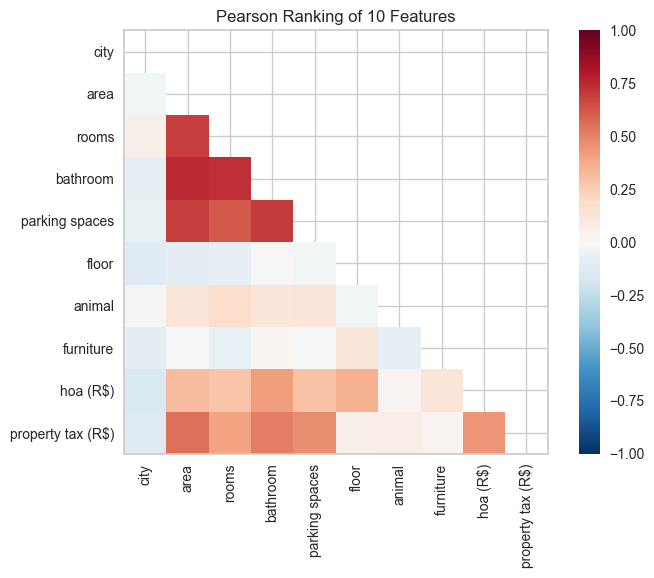

In [33]:
from yellowbrick.features import Rank2D

#metodo
correlation= Rank2D(algoritmo='pearson')

correlation.fit(characteristics,provisional)
correlation.transform(characteristics)
correlation.show();

In [34]:
from sklearn.model_selection import train_test_split


x_treino,x_teste,y_treino,y_teste=train_test_split(
    characteristics,provisional,test_size=0.2,random_state=10
)



In [35]:
from sklearn.feature_selection import mutual_info_regression,SelectKBest

def SelectionFeatures(x_treino,y_treino):
    selection= SelectKBest(score_func= mutual_info_regression,k='all')
    
    selection.fit(x_treino,y_treino)
    return selection

scores=SelectionFeatures(x_treino,y_treino)
listScore=[]
for posit,score in enumerate(scores.scores_):
    dicscore={'column':x_treino.columns[posit],'score':score}
    listScore.append(dicscore)

listScore=sorted(listScore,key=lambda dic:dic['score'],reverse=True)

for d in listScore:
    print(d['column']+' -> '+str(d['score']) )

bathroom -> 0.33749854418109804
area -> 0.3166614877798537
rooms -> 0.24275711731734173
parking spaces -> 0.2353987347948885
hoa (R$) -> 0.17447628670928017
property tax (R$) -> 0.15050841531804826
city -> 0.07930871641139481
furniture -> 0.02417711127634492
animal -> 0.014236581074748678
floor -> 0.01340380484539061


# Construção do modelo

In [36]:
from sklearn.ensemble import RandomForestRegressor

#instancia
modelForest= RandomForestRegressor(max_depth= 5)

# fit modelo
modelForest.fit(x_treino,y_treino)



RandomForestRegressor(max_depth=5)

In [37]:
#avaliação
prevision= modelForest.predict(x_teste)

prevision[0:5]

array([1984.2683155 , 8609.29737191, 1437.62848618, 2683.09476479,
       1584.55146554])

In [38]:
x_teste.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),property tax (R$)
2883,1,77,2,2,1,8,1,0,840,34
4248,1,400,7,7,0,0,1,0,0,1667
2042,5,85,2,1,1,1,1,0,230,61
5185,1,72,2,2,0,1,1,1,700,1
8394,1,67,2,1,1,7,1,0,570,4


In [39]:
y_treino.head()

8408     1250
639      3500
10196    5500
5840     4000
8103     2800
Name: rent amount (R$), dtype: int64

In [40]:
#função de avaliar 
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt


print(f'RMSE:{sqrt(mean_squared_error(y_teste,prevision))}')
print(f'Score: {r2_score(y_teste,prevision)}')

RMSE:2147.2786038854565
Score: 0.6186126154193236


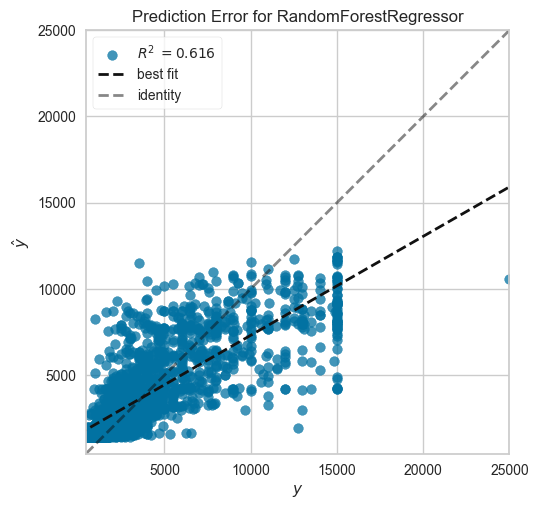

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [41]:
#avaliando com yellowbrick
from yellowbrick.regressor import PredictionError

#instacia
model=RandomForestRegressor(max_depth=5)
modelError= PredictionError(model)


#fit
modelError.fit(x_treino,y_treino)
modelError.score(x_teste,y_teste)
modelError.show()

# Exportação


In [42]:
import joblib

joblib.dump(modelForest,'Modelo_Floresta_Aleatoria_v1.pkl')

['Modelo_Floresta_Aleatoria_v1.pkl']

In [47]:
modelLoad= joblib.load('../model/Modelo_Floresta_Aleatoria_v1.pkl')

In [49]:
x_teste.head(1).values

array([[  1,  77,   2,   2,   1,   8,   1,   0, 840,  34]], dtype=int64)

In [48]:
modelLoad.predict(x_teste.head(1).values)

array([1899.56881332])